In [9]:
# import packages
import sys
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.append(str(Path("..").resolve() / "src"))

In [10]:
# import previously loaded data
from bank_marketing.data_ingestion import extract_and_load

In [11]:
# review data
df = extract_and_load(Path("../data"))
df.shape

(41188, 21)

In [12]:
# view data info
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  str    
 2   marital         41188 non-null  str    
 3   education       41188 non-null  str    
 4   default         41188 non-null  str    
 5   housing         41188 non-null  str    
 6   loan            41188 non-null  str    
 7   contact         41188 non-null  str    
 8   month           41188 non-null  str    
 9   day_of_week     41188 non-null  str    
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  str    
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null  float64
 1

In [13]:
# see target var distributions
df['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

In [14]:
# see target var distribution %
df["y"].value_counts(normalize=True)

y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64

In [15]:
# create numeric target
df['y_bin'] = (df['y'] == "yes").astype(int)

In [16]:
# create numeric summary
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
df[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


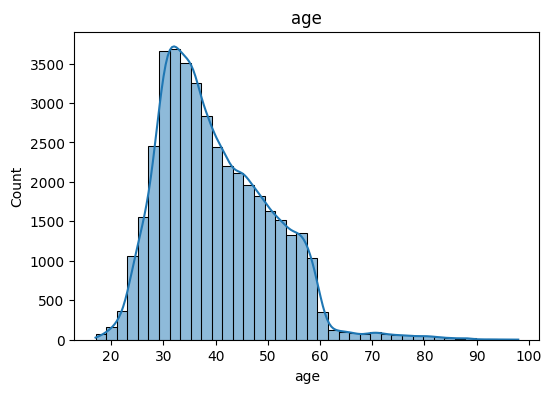

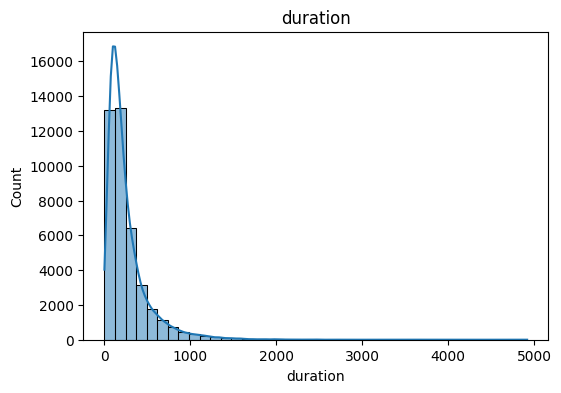

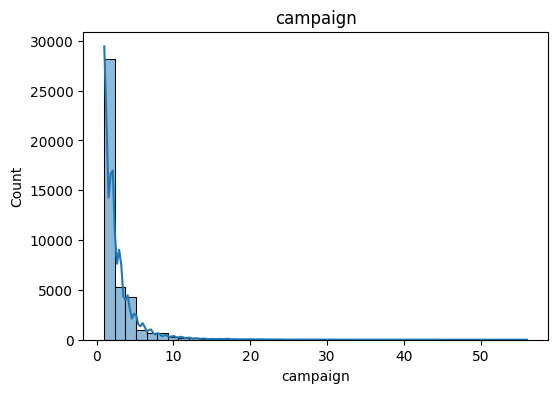

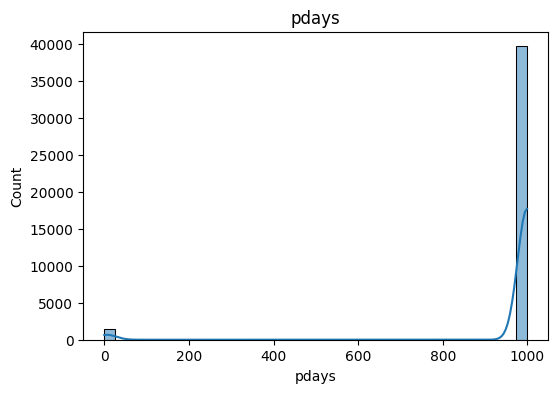

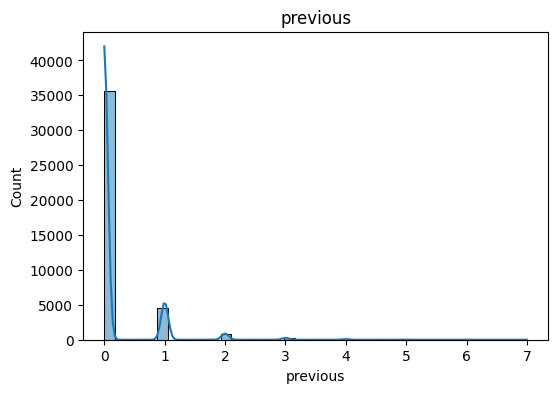

In [17]:
# numeric distribution visual
for col in ["age", "duration", "campaign", "pdays", "previous"]:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=40, kde=True)
    plt.title(col)
    plt.show

In [18]:
# define numerical columns
categorical_cols = df.select_dtypes(include="object").columns
categorical_cols

C:\Users\marvi\AppData\Local\Temp\ipykernel_37424\2255384372.py:2: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_cols = df.select_dtypes(include="object").columns


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='str')

In [19]:
# categorical column distributions
for col in ["job", "education", "contact"]:
    print(f"\n{col}")
    print(df[col].value_counts(normalize=True))


job
job
admin.           0.253035
blue-collar      0.224677
technician       0.163713
services         0.096363
management       0.070992
retired          0.041760
entrepreneur     0.035350
self-employed    0.034500
housemaid        0.025736
unemployed       0.024619
student          0.021244
unknown          0.008012
Name: proportion, dtype: float64

education
education
university.degree      0.295426
high.school            0.231014
basic.9y               0.146766
professional.course    0.127294
basic.4y               0.101389
basic.6y               0.055647
unknown                0.042027
illiterate             0.000437
Name: proportion, dtype: float64

contact
contact
cellular     0.634748
telephone    0.365252
Name: proportion, dtype: float64


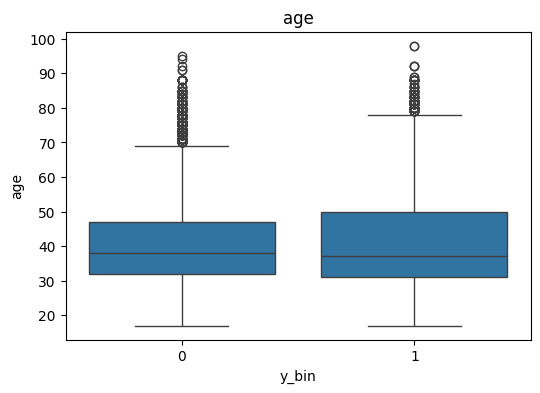

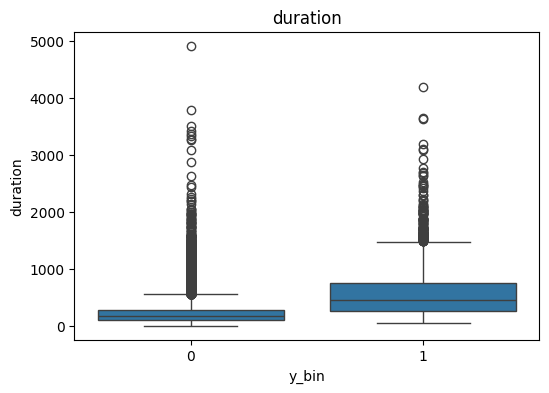

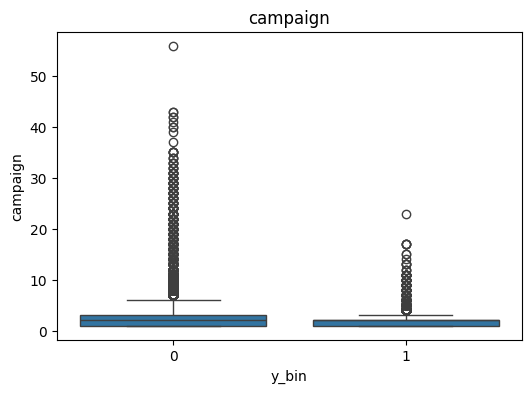

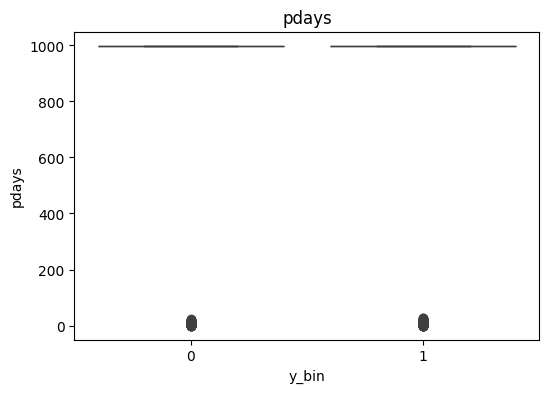

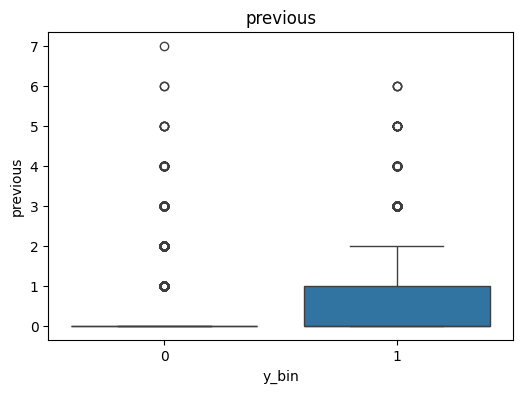

In [20]:
# feature v. target visual
for col in ["age", "duration", "campaign", "pdays", "previous"]:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x="y_bin", y=col, data=df)
    plt.title(col)
    plt.show()

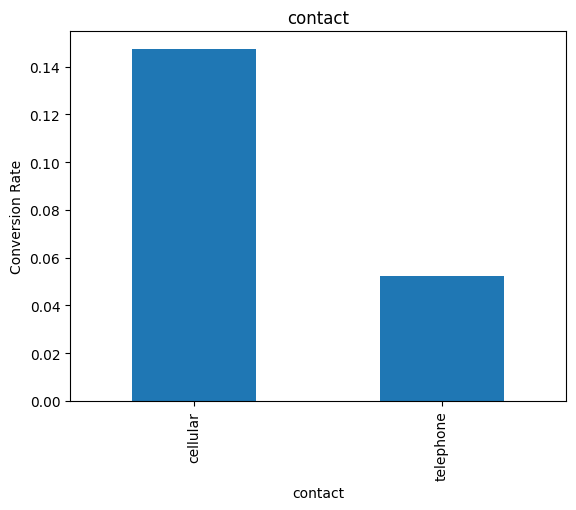

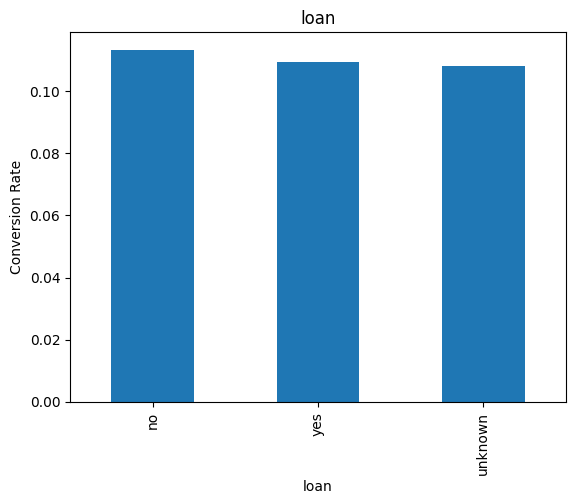

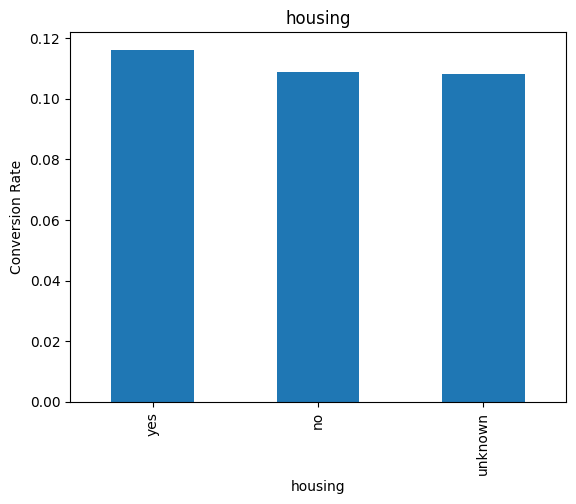

In [21]:
# categorical distrbutions
for col in ["contact", "loan", "housing"]:
    (
        df.groupby(col)["y_bin"]
        .mean()
        .sort_values(ascending=False)
        .plot(kind="bar", title=col)
    )
    plt.ylabel("Conversion Rate")
    plt.show()


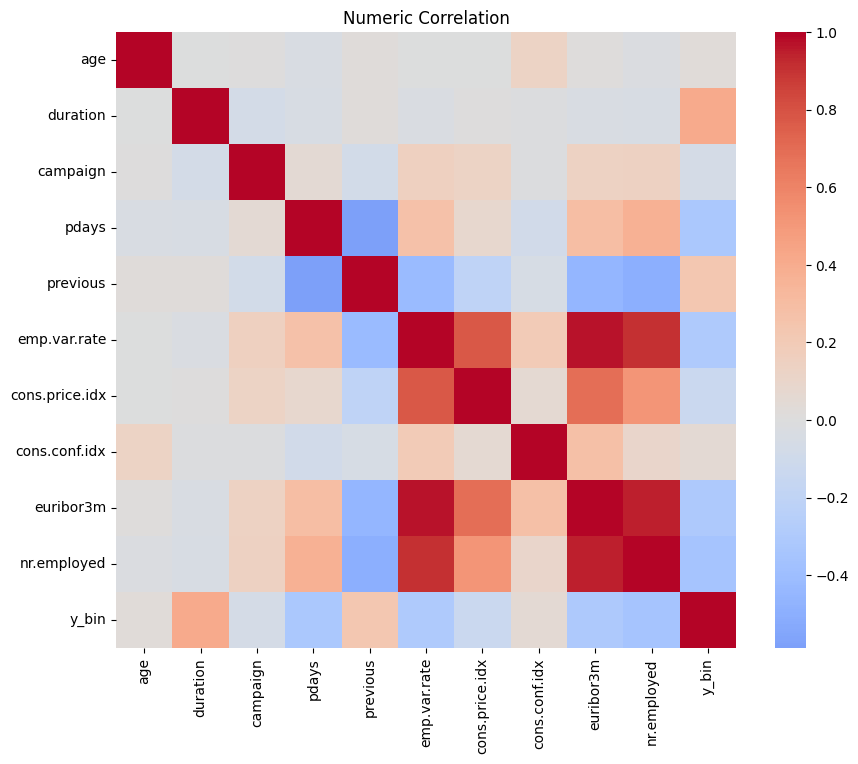

In [22]:
# see correlation
corr = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Numeric Correlation")
plt.show()

The dataset contains ~41k observations with a highly imbalanced binary outcome. 
Numeric features such as duration, campaign, and pdays counts are heavily skewed with long tails, 
categorical variables contain sparse levels and implicit missingness, and marginal correlations with the outcome are weak—motivating multivariate modeling.

In [23]:
# look at mean for duration
df.groupby("y_bin")["duration"].describe()

,count,mean,std,min,25%,50%,75%,max
y_bin,,,,,,,,
0,36548.0,220.844807,207.096293,0.0,95.0,163.5,279.00,4918.0
1,4640.0,553.191164,401.171871,37.0,253.0,449.0,741.25,4199.0


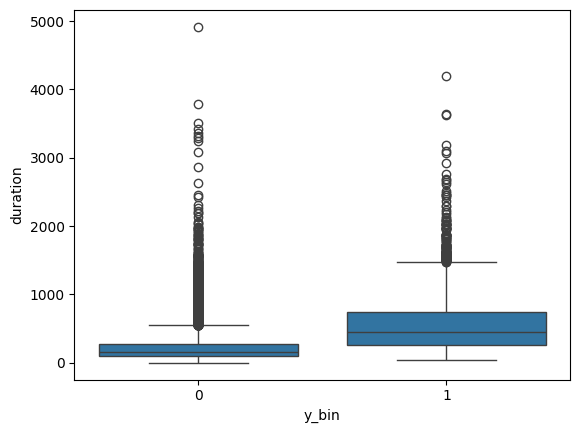

In [24]:
# visualize mean for duration
sns.boxplot(x="y_bin", y="duration", data=df)
plt.show()

"duration" is removed because it is considered 'leakage'.
This is because it is a variable that is measured AFTER the outcome occurs.
i.e., call duration is set after the call ends for subscribers and non-subscribers.

In [25]:
# save processed data
processed_dir = Path("../data/processed")
processed_dir.mkdir(parents=True, exist_ok=True)

df.to_csv(processed_dir / "bank_clean.csv", index=False)